# **2022년 빅데이터 동아리 특강 - 오리엔테이션 (2022년 8월 8일)**

대학원 기술경영학과 (Management of Technology) - 송지훈 교수

🧑👩 학생 여러분, 빅데이터 동아리에 오신걸 환영합니다 !\
짧은 시간이지만, 여러분들이 다양한 특강을 기반으로 **스스로 학습** 및 **경진대회**에 **참가** 할 수 있는 **역량**을 갖출 수 있도록 지원하는게 주 목적 입니다.

**나중을 위한 팁**\
✅ You can only learn data science by doing data science. (실제로 코드를 구현해 봐야 합니다 ~) \
✅ Practice, practice, practice. (연습하고 또 연습하세요, 짧은 강의시간에 모든 세세한 내용을 전부 다룰수 없습니다 + 끊임없는 연습만이 완벽함을 만듭니다. )\
✅ Free resources everywhere. (인터넷상에는 무료로 데이터 분석 또는 프로그래밍 관련 공부를 할 수 있는 많은 자료들이 존재 합니다. 적극적으로 찾아서 이용하세요.)

# 참조 웹사이트 (https://www.kaggle.com/datasets/agileteam/bigdatacertificationkr)

## **문제11**

(1) 주어진 데이터 중 train.csv에서 'SalePrice'컬럼의 왜도와 첨도를 구한 값과, 'SalePrice'컬럼을 스케일링(log1p)로 변환한 이후 왜도와 첨도를 구해 모두 더한 다음 소수점 2째자리까지 출력하시오
데이터셋 : House Prices - Advanced Regression Technique (https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [1]:
import pandas as pd
import numpy as np

In [7]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
pd.set_option('display.max_columns', None) # 무슨 기능일까?

In [3]:
df.shape

(1460, 81)

In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

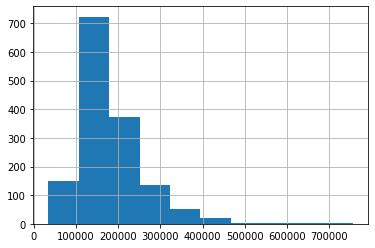

In [8]:
# SalePrice 시각화 - 히스토그램
# pandas의 기본 기능 활용
df['SalePrice'].hist()

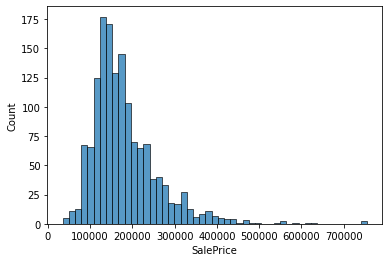

In [9]:
import seaborn as sns
sns.histplot(x='SalePrice',data=df)

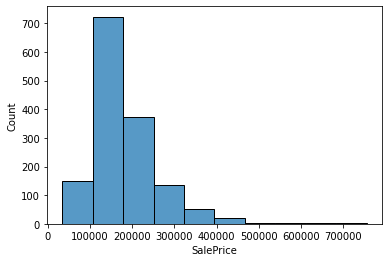

In [10]:
sns.histplot(x='SalePrice',data=df, bins = 10)

In [11]:
# 'SalePrice'컬럼 왜도와 첨도계산
# 왜도: 데이터의 분포도가 정규분포를 따르는지 안따르는지 ("종모양" = 정규분포) - 즉 분포의 비대칭성을 나타냄
# 첨도: 데이터 분포의 "뾰족함" 정도 (중심에 더 몰려 있는지, 아닌지 판단)
# 왜도: skewness
# 첨도: kurtosis 
s1 = df['SalePrice'].skew()
k1 = df['SalePrice'].kurt()
print("왜도:" ,s1)
print("첨도:" ,k1)

왜도: 1.8828757597682129
첨도: 6.536281860064529


In [12]:
# 'SalePrice'컬럼 로그변환
# 로그는 큰 값을 작게 표기하기 위해 고안된 방법
# 밑이 e(자연 상수)인 log
df['SalePrice_transformed'] = np.log1p(df['SalePrice'])

In [22]:
# np.log(1)
# np.log(np.e)

1.0

In [14]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [13]:
df['SalePrice_transformed'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice_transformed, dtype: float64

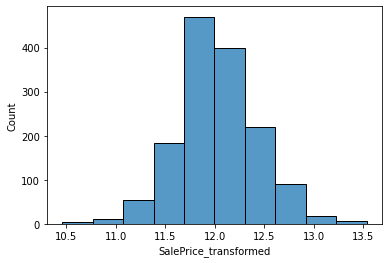

In [15]:
sns.histplot(x='SalePrice_transformed',data=df, bins = 10)

In [16]:
s2 = df['SalePrice_transformed'].skew()
print("보정한 왜도 값:" ,s2)
# 0에 가까울 수록, 정규분포를 따름

보정한 왜도 값: 0.12134661989685333


In [23]:
k2 = df['SalePrice_transformed'].kurt()
print("보정한 첨도 값:" ,k2)

보정한 첨도 값: 0.809519155707878


In [24]:
# 모두 더한 다음, 소수점 2자리 까지만 출력
print(round(s1+s2+k1+k2,2))

9.35


## **문제12**

(1) 조건에 맞는 데이터 표준편차 구하기

주어진 데이터 셋에서 'f4'컬럼 값이 'ENFJ'와 'INFP'인 'f1'의 표준편차 차이를 절대값으로 구하시오

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [2]:
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [3]:
# 조건에 맞는 f1의 표준편차
# ENFJ
enfj = df[df['f4']=='ENFJ']['f1'].std()
enfj

17.727097901235837

In [4]:
# 조건에 맞는 f1의 표준편차
infp = df[df['f4']=='INFP']['f1'].std()
infp

23.586719427112648

In [5]:
# 두 표준편차 차이 절대값 출력
# np.abs()  --> abs = absolute (절대값을 지칭)
print(np.abs(enfj - infp))

5.859621525876811


## **문제13**

(1) 결측치 제거 및 그룹 합계에서 조건에 맞는 값 찾아 출력

주어진 데이터 셋에서 'f1'컬럼 결측 데이터를 제거하고, 'city'와 'f2'을 기준으로 묶어 합계를 구하고, 'city가 경기이면서 f2가 0'인 조건에 만족하는 f1 값을 구하시오

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [7]:
# 결측치 제거 방법 1
df_removed = df[~df['f1'].isnull()]
df_removed

,id,age,city,f1,f2,f3,f4,f5
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [8]:
# 결측치 제거 방법 2
df_removed2 = df.dropna(subset=['f1'])
df_removed2

,id,age,city,f1,f2,f3,f4,f5
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869
5,id06,22.0,서울,57.0,0,vip,INTP,20.129444
6,id07,36.3,서울,60.0,1,NaN,ISFJ,9.796378
...,...,...,...,...,...,...,...,...
94,id95,77.0,경기,43.0,1,NaN,INTJ,91.297791
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [9]:
# 그룹 합계 계산
df_sum = df_removed.groupby(['city','f2']).sum()
df_sum

age     f1          f5
city f2                          
경기   0   720.4  833.0  943.944823
     1   696.0  670.0  657.241212
     2   239.0  311.0  362.300060
대구   0   387.0  527.0  183.199568
     1   217.6  235.0  241.333824
     2   140.0  211.0   79.667919
부산   0   331.0  389.0  284.371097
     1   188.7  315.0  299.270973
     2   -13.5   47.0   67.886373
서울   0   145.0  278.0  218.528577
     1   315.3  534.0  438.485010
     2    68.3  207.0  126.661135

In [10]:
# 조건에 맞는 값 출력
print(df_sum.iloc[0]['f1'])

833.0


## **문제14**

(1) 조건에 맞는 최대값 출력

주어진 데이터 셋에서 'f4'컬럼의 값이 'ESFJ'인 데이터를 'ISFJ'로 대체하고, 'city'가 '경기'이면서 'f4'가 'ISFJ'인 데이터 중 'age'컬럼의 최대값을 출력하시오!

In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')

In [20]:
# ESFJ 값을 가진 데이터 확인
df[df['f4'] == 'ESFJ']

,id,age,city,f1,f2,f3,f4,f5
8,id09,3.3,서울,35.0,2,NaN,ESFJ,17.252986
12,id13,15.0,서울,68.0,0,NaN,ESFJ,83.685380
30,id31,86.0,부산,77.0,0,NaN,ESFJ,73.586397
58,id59,64.0,대구,NaN,1,NaN,ESFJ,20.129444
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034


In [21]:
# 값 변경하기 
df['f4_changed'] = df['f4'].replace('ESFJ', 'ISFJ')
df

,id,age,city,f1,f2,f3,f4,f5,f4_changed
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791,ENFJ
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826,ENFJ
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986,ISTJ
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078,INFP
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869,ISFJ
...,...,...,...,...,...,...,...,...,...
95,id96,92.0,경기,53.0,1,NaN,ENTJ,52.667078,ENTJ
96,id97,100.0,경기,NaN,0,NaN,INFP,67.886373,INFP
97,id98,39.0,경기,58.0,2,NaN,INFP,98.429899,INFP
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFJ


In [22]:
# 2개의 조건에 맞는 값
df[(df['f4_changed'] == 'ISFJ') & (df['city'] == '경기')]

,id,age,city,f1,f2,f3,f4,f5,f4_changed
62,id63,88.0,경기,86.0,1,NaN,ISFJ,73.586397,ISFJ
66,id67,66.0,경기,52.0,1,NaN,ISFJ,73.586397,ISFJ
72,id73,90.0,경기,NaN,1,NaN,ISFJ,73.586397,ISFJ
80,id81,86.0,경기,50.0,1,NaN,ISFJ,37.113739,ISFJ
98,id99,1.0,경기,47.0,0,NaN,ESFJ,97.381034,ISFJ


In [24]:
# 2개의 조건에 맞는 값
print(df[(df['f4_changed'] == 'ISFJ') & (df['city'] == '경기')]['age'].max())

90.0


## **문제15**

(1) 조건에 맞는 최대값 출력

주어진 데이터 셋에서 'f2' 컬럼이 1인 조건에 해당하는 데이터의 'f1'컬럼 누적합을 계산한다. 이때 발생하는 누적합 결측치는 바로 뒤의 값을 채우고, 누적합의 평균값을 출력한다. (단, 결측치 바로 뒤의 값이 없으면 다음에 나오는 값을 채워넣는다)

In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/gnu-mot/student_club/main/big_practice1.csv')
df.head()

,id,age,city,f1,f2,f3,f4,f5
0,id01,2.0,서울,NaN,0,NaN,ENFJ,91.297791
1,id02,9.0,서울,70.0,1,NaN,ENFJ,60.339826
2,id03,27.0,서울,61.0,1,NaN,ISTJ,17.252986
3,id04,75.0,서울,NaN,2,NaN,INFP,52.667078
4,id05,24.0,서울,85.0,2,NaN,ISFJ,29.269869


In [26]:
df[df['f2'] == 1]['f1'].sum() # 합

1754.0

In [ ]:
df[df['f2'] == 1]['f1'].cumsum() # 누적합

In [31]:
df_cumsum =df[df['f2'] == 1]['f1'].cumsum() 
df_cumsum

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16       NaN
19     534.0
20       NaN
21     606.0
22     681.0
25     738.0
27     772.0
33       NaN
35     849.0
37       NaN
46     924.0
49    1002.0
51    1084.0
53       NaN
55       NaN
58       NaN
62    1170.0
65       NaN
66    1222.0
69    1318.0
72       NaN
77    1414.0
80    1464.0
82    1514.0
86       NaN
88    1580.0
91    1658.0
93       NaN
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [32]:
# 결측치 처리 (뒤에 나오는 값으로 채움)
df_cumsum = df_cumsum.fillna(method = 'bfill')
df_cumsum

1       70.0
2      131.0
6      191.0
7      292.0
9      366.0
13     416.0
14     483.0
16     534.0
19     534.0
20     606.0
21     606.0
22     681.0
25     738.0
27     772.0
33     849.0
35     849.0
37     924.0
46     924.0
49    1002.0
51    1084.0
53    1170.0
55    1170.0
58    1170.0
62    1170.0
65    1222.0
66    1222.0
69    1318.0
72    1414.0
77    1414.0
80    1464.0
82    1514.0
86    1580.0
88    1580.0
91    1658.0
93    1701.0
94    1701.0
95    1754.0
Name: f1, dtype: float64

In [33]:
# 평균 출력
print(df_cumsum.mean())

980.3783783783783
